In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [11]:

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


## Validation Image Preprocessing

In [14]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [15]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [16]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[138.5  133.5  155.5 ]
   [136.   131.   153.  ]
   [130.5  125.5  147.5 ]
   ...
   [137.25 133.25 156.25]
   [136.25 132.25 155.25]
   [136.5  132.5  155.5 ]]

  [[136.75 131.75 153.75]
   [153.25 148.25 170.25]
   [135.   130.   152.  ]
   ...
   [131.75 127.75 150.75]
   [137.5  133.5  156.5 ]
   [128.   124.   147.  ]]

  [[135.   130.   152.  ]
   [135.5  130.5  152.5 ]
   [146.   141.   163.  ]
   ...
   [132.75 128.75 151.75]
   [137.25 133.25 156.25]
   [133.25 129.25 152.25]]

  ...

  [[ 84.25  68.25  81.25]
   [ 80.    64.    77.  ]
   [ 81.5   65.5   78.5 ]
   ...
   [ 78.25  99.25  80.75]
   [ 69.75  90.75  72.25]
   [ 92.   113.25  94.25]]

  [[ 76.75  60.75  73.75]
   [ 78.75  62.75  75.75]
   [ 78.75  62.75  75.75]
   ...
   [ 87.5  108.5   92.5 ]
   [ 88.5  109.5   94.  ]
   [ 59.75  80.5   65.75]]

  [[ 76.75  60.75  73.75]
   [ 71.75  55.75  68.75]
   [ 73.5   57.5   70.5 ]
   ...
   [ 65.5   85.5   73.5 ]
   [ 68.5   88.5   77.  ]
   [ 65.5   85.5   7

## Building model

In [17]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()

## Building Convolution Layer


In [19]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [20]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [21]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [23]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(units=1500,activation='relu'))

In [27]:
model.add(Dropout(0.4))

In [28]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

## Compiling Model

In [29]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

In [31]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 173s 75ms/step - loss: 1.3585 - accuracy: 0.6011 - val_loss: 0.6218 - val_accuracy: 0.8047
Epoch 2/10
2197/2197 [==============================] - 135s 61ms/step - loss: 0.4396 - accuracy: 0.8609 - val_loss: 0.2482 - val_accuracy: 0.9198
Epoch 3/10
2197/2197 [==============================] - 133s 60ms/step - loss: 0.2695 - accuracy: 0.9140 - val_loss: 0.2062 - val_accuracy: 0.9330
Epoch 4/10
2197/2197 [==============================] - 131s 60ms/step - loss: 0.1795 - accuracy: 0.9411 - val_loss: 0.1948 - val_accuracy: 0.9400
Epoch 5/10
2197/2197 [==============================] - 131s 60ms/step - loss: 0.1403 - accuracy: 0.9546 - val_loss: 0.1704 - val_accuracy: 0.9455
Epoch 6/10
2197/2197 [==============================] - 132s 60ms/step - loss: 0.1066 - accuracy: 0.9658 - val_loss: 0.1131 - val_accuracy: 0.9643
Epoch 7/10
2197/2197 [==============================] - 133s 60ms/step - loss: 0.0892 - accuracy: 0.9711 - val_loss: 0

## Model Evaluation

In [32]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 50s 22ms/step - loss: 0.0445 - accuracy: 0.9853


In [33]:
print(train_loss,train_acc)

0.04445189610123634 0.9853474497795105


In [35]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 12s 22ms/step - loss: 0.1318 - accuracy: 0.9605


In [36]:
print(val_loss,val_acc)

0.13177616894245148 0.9605053663253784


## Saving Model

In [39]:
model.save("trained_model.keras")

In [40]:
training_history.history

{'loss': [1.358464002609253,
  0.43959149718284607,
  0.2694627642631531,
  0.17953115701675415,
  0.14031726121902466,
  0.10655929893255234,
  0.08924677968025208,
  0.07164415717124939,
  0.06714601814746857,
  0.055141083896160126],
 'accuracy': [0.6010669469833374,
  0.8609004616737366,
  0.9140479564666748,
  0.941148042678833,
  0.9545771479606628,
  0.965772807598114,
  0.9711074829101562,
  0.9764421582221985,
  0.9782772660255432,
  0.9821608662605286],
 'val_loss': [0.621772050857544,
  0.24815715849399567,
  0.20615917444229126,
  0.19482463598251343,
  0.17036502063274384,
  0.11308781057596207,
  0.09997448325157166,
  0.1374412477016449,
  0.11010275036096573,
  0.13177624344825745],
 'val_accuracy': [0.8046892881393433,
  0.9198155999183655,
  0.9330184459686279,
  0.9400182366371155,
  0.9454814195632935,
  0.9642613530158997,
  0.9681311249732971,
  0.959822416305542,
  0.9685863852500916,
  0.9605053663253784]}

In [41]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

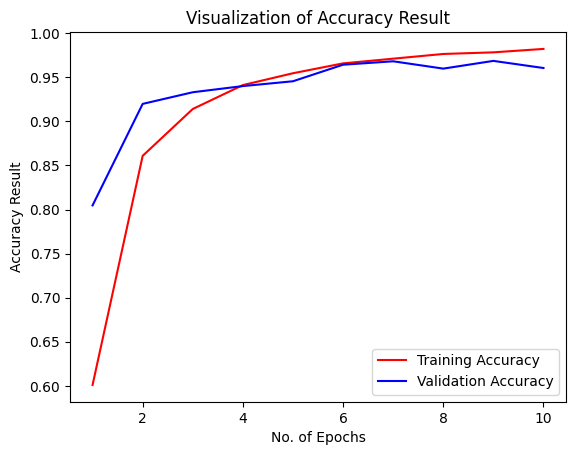

In [43]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [44]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [45]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [46]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 12s 21ms/step


(array([[9.9999881e-01, 1.6588008e-07, 3.7824854e-09, ..., 5.6343998e-14,
         9.2067033e-14, 1.5194483e-11],
        [9.9999928e-01, 5.6419242e-07, 7.5613720e-09, ..., 2.7651845e-13,
         1.1499729e-13, 2.5108104e-12],
        [9.9999940e-01, 5.4970621e-07, 1.8370255e-08, ..., 9.0579188e-15,
         8.3825839e-13, 8.3204853e-11],
        ...,
        [1.6243593e-10, 3.1800310e-14, 1.1284684e-10, ..., 1.9690714e-12,
         1.5377143e-12, 9.9998629e-01],
        [1.0090343e-09, 8.9042407e-13, 3.9540082e-09, ..., 2.5041543e-11,
         1.3762444e-11, 9.9999940e-01],
        [6.7090734e-13, 5.7298844e-15, 3.3607422e-12, ..., 3.7142539e-15,
         2.1373967e-11, 9.9999833e-01]], dtype=float32),
 (17572, 38))

In [47]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [48]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [49]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [50]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.90      0.93       504
                                 Apple___Black_rot       0.93      1.00      0.96       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.88      0.91      0.90       502
                               Blueberry___healthy       1.00      0.90      0.95       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.87      0.92       410
                       Corn_(maize)___Common_rust_       0.97      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.98      0.

In [55]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[453,  14,   0, ...,   0,   0,   0],
       [  0, 496,   0, ...,   0,   0,   0],
       [  1,   0, 435, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 475,   0,   0],
       [  0,   0,   0, ...,   0, 440,   0],
       [  0,   0,   0, ...,   0,   0, 476]], dtype=int64)

### Confusion Matrix Visualization

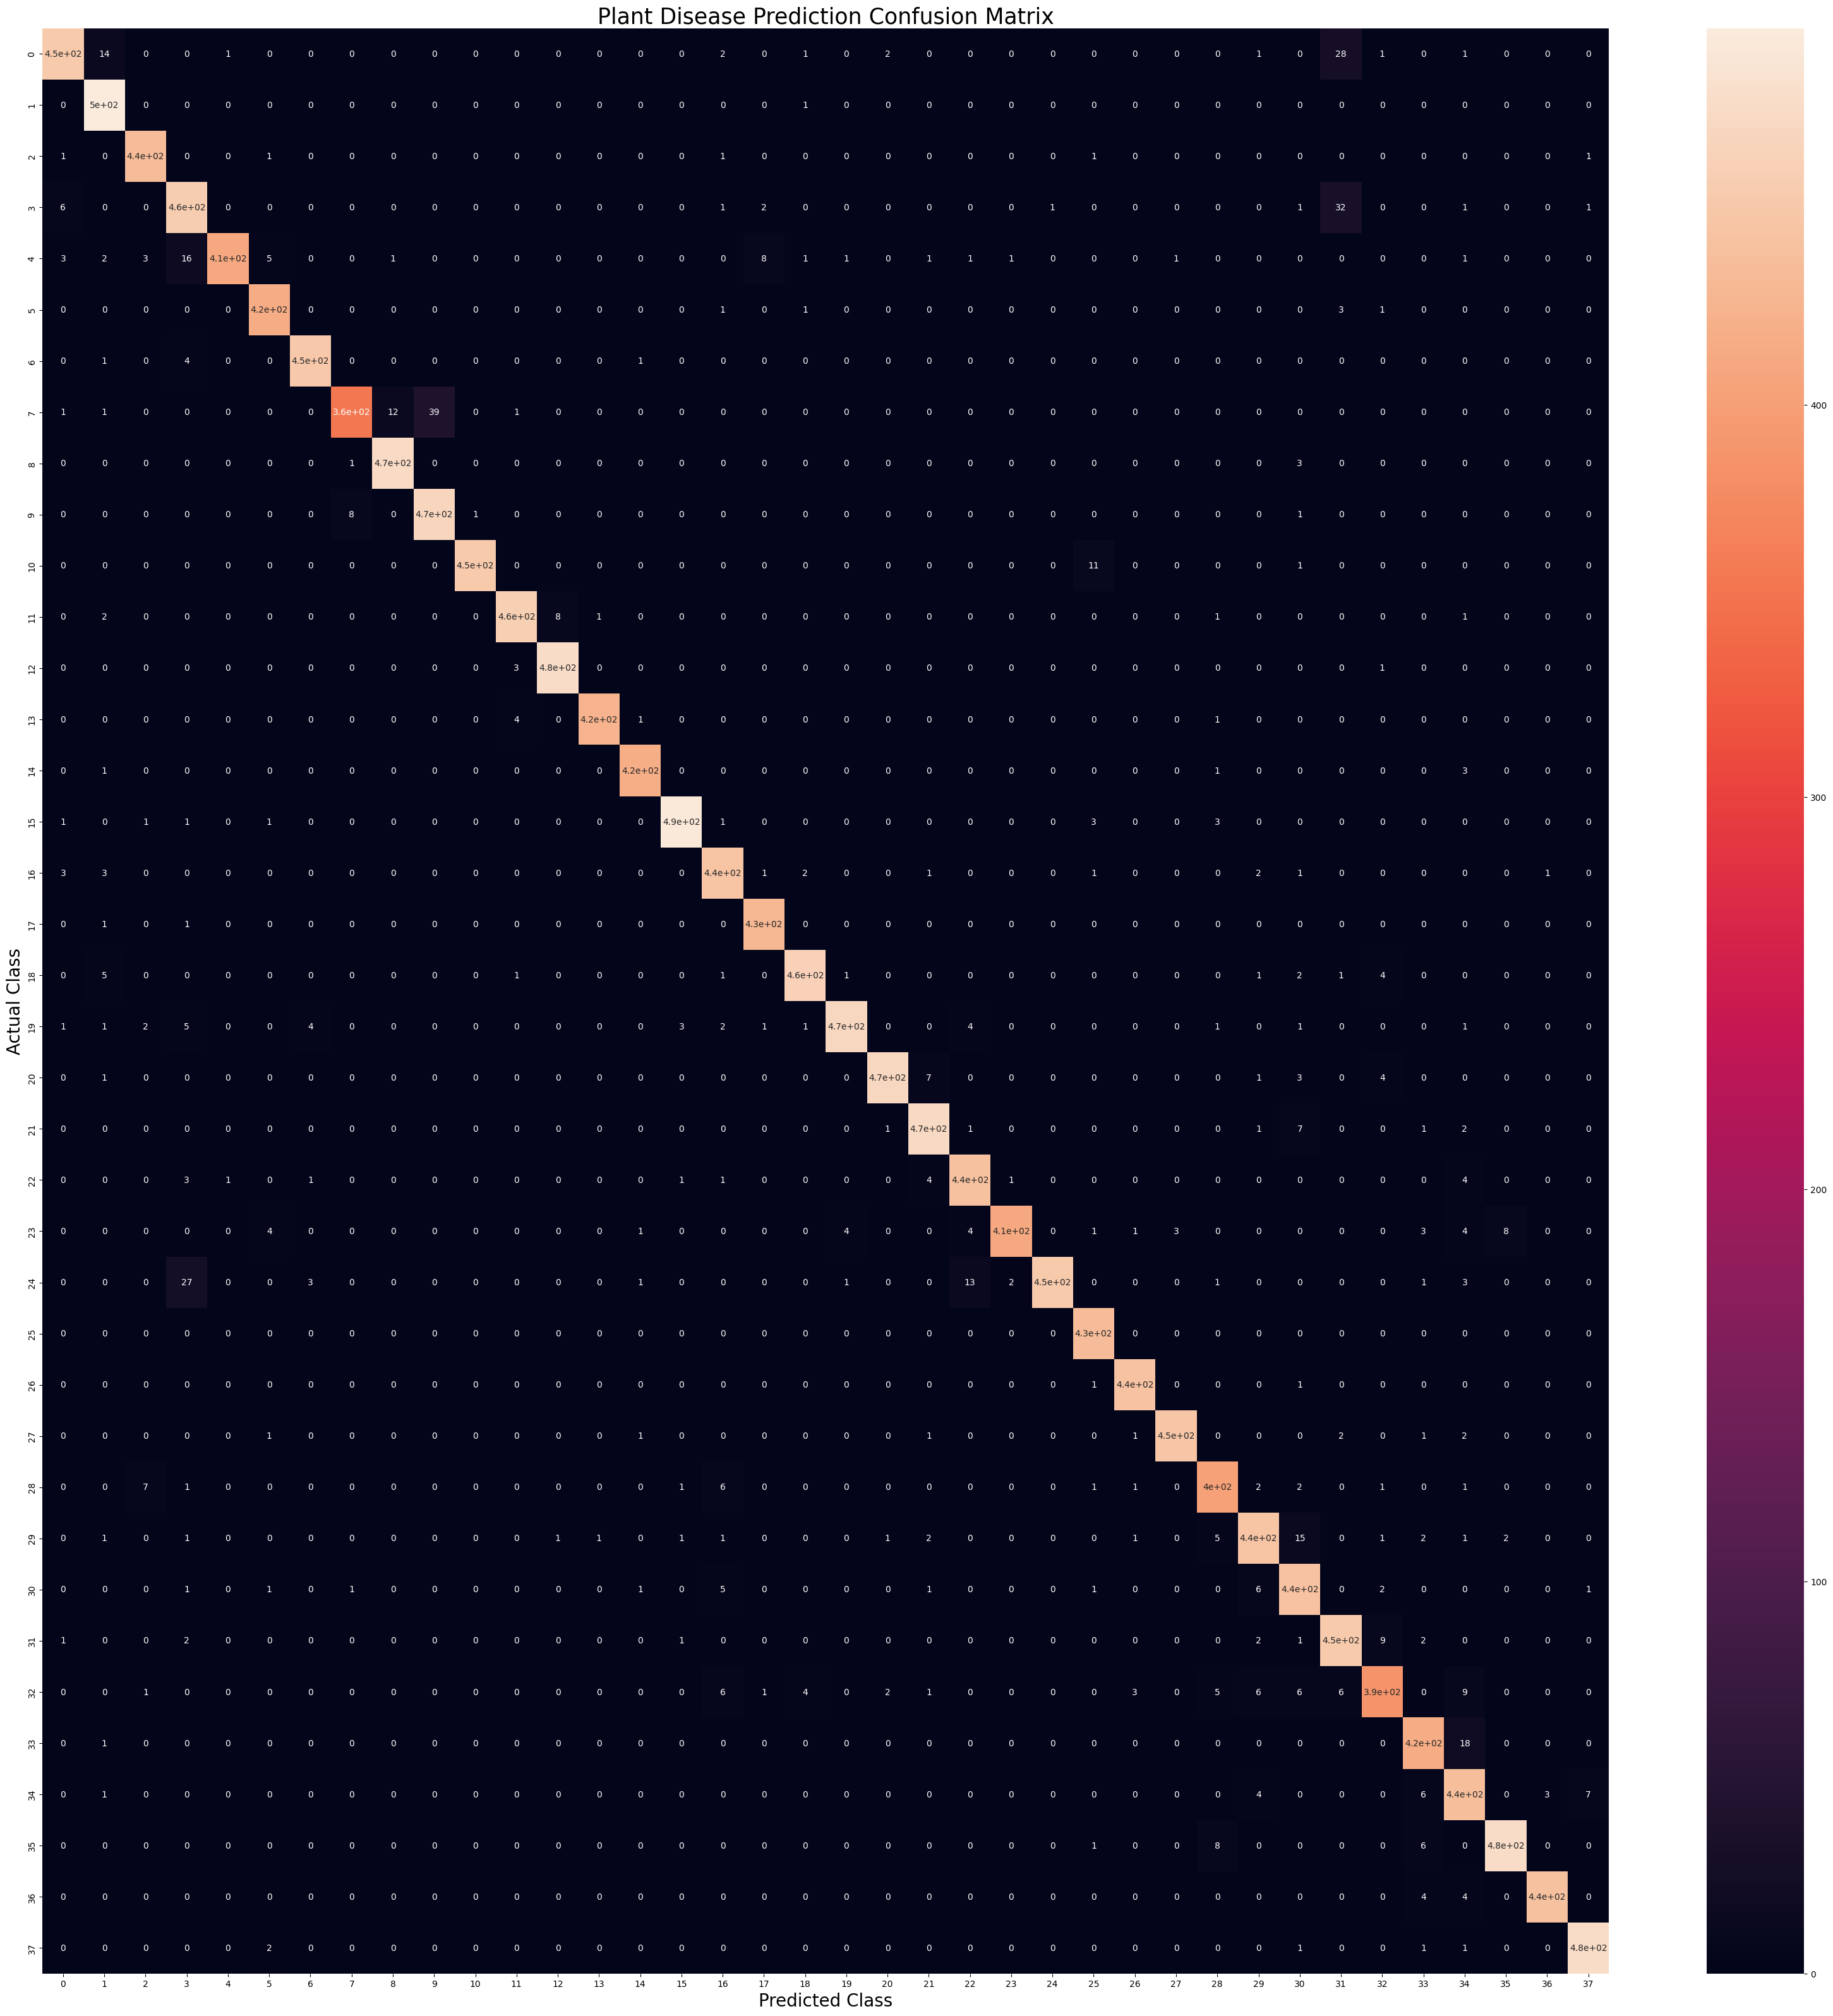

In [58]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()